<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Fashion-MNIST" data-toc-modified-id="Fashion-MNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fashion-MNIST</a></span></li><li><span><a href="#Download-the-Package-and-set-up-the-classes" data-toc-modified-id="Download-the-Package-and-set-up-the-classes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Download the Package and set up the classes</a></span></li><li><span><a href="#Visualize-a-couple-of-samples" data-toc-modified-id="Visualize-a-couple-of-samples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualize a couple of samples</a></span></li><li><span><a href="#Set-variables" data-toc-modified-id="Set-variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Set variables</a></span></li><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Prepare Data</a></span></li><li><span><a href="#Define-the-model" data-toc-modified-id="Define-the-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Define the model</a></span></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fit the model</a></span></li><li><span><a href="#Nice!-0.89-in--~25-minutes-of-training" data-toc-modified-id="Nice!-0.89-in--~25-minutes-of-training-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Nice! 0.89 in  ~25 minutes of training</a></span></li></ul></div>

# Fashion-MNIST 
The [Fashion-MNIST dataset](https://www.openml.org/d/40996) contains 70,000 images of Zalando fashion products, classified into 10 types of clothing, each represented by 28 by 28 pixel values. You can download it from OpenML and visualize some of the examples

In [1]:
# General imports
%matplotlib inline
from preamble import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures

Using TensorFlow backend.


# Download the Package and set up the classes

In [3]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

# Visualize a couple of samples

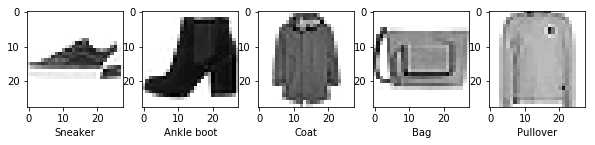

In [4]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[y[n]]))
plt.show();

# Set variables

In [19]:
cutoff_val = 0.8
cutoff_test = 0.9
num_classes = len(set(y))
batch_size = 128
epochs = 5
input_shape = (28, 28, 1)

# Prepare Data

In [14]:
cutoff_v = round(cutoff_val*X.shape[0])
cutoff_t = round(cutoff_test*X.shape[0])

X = X.reshape((X.shape[0], 28, 28, 1))
X_train = X[0:cutoff_v,:,:]
X_val = X[cutoff_v:cutoff_t,:,:]
X_test = X[cutoff_t:X.shape[0],:,:]

y_train = y[0:cutoff_v]
y_val = y[cutoff_v:cutoff_t]
y_test = y[cutoff_t:len(y)]

In [15]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the model

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

# Fit the model

In [20]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 56000 samples, validate on 7000 samples
Epoch 1/5
56000/56000 [==============================] - 334s 6ms/step - loss: 0.4883 - acc: 0.8286 - val_loss: 0.3661 - val_acc: 0.8686
Epoch 2/5
56000/56000 [==============================] - 309s 6ms/step - loss: 0.3868 - acc: 0.8626 - val_loss: 0.3273 - val_acc: 0.8786
Epoch 3/5
56000/56000 [==============================] - 290s 5ms/step - loss: 0.3429 - acc: 0.8768 - val_loss: 0.3007 - val_acc: 0.8920
Epoch 4/5
56000/56000 [==============================] - 281s 5ms/step - loss: 0.3167 - acc: 0.8856 - val_loss: 0.3000 - val_acc: 0.8943
Epoch 5/5
56000/56000 [==============================] - 284s 5ms/step - loss: 0.2980 - acc: 0.8937 - val_loss: 0.2881 - val_acc: 0.9003


# Nice! 0.89 in  ~25 minutes of training

In [23]:
score = model.evaluate(X_test, y_test, verbose=1)

7000/7000 [==============================] - 12s 2ms/step


In [30]:
print(list(zip(tuple(score), tuple(model.metrics_names))))

[(0.3021097526720592, 'loss'), (0.8962857143538339, 'acc')]
